In [2]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [4]:
df = pd.read_csv('dataset.csv')
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1217628182611927040,boazbaraktcs,0,1778,1,0,0.000,459,18538,0.025,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,36741729,Matthew_Brody,1,5690,0,0,0.000,615,456,1.349,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1679822588,GrianMC,1,4119,0,0,NaN,274,282752,0.001,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,1519144464,NikhilSewdass,0,4183,0,0,0.933,409,191,2.141,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,15211869,jamie_love,0,6001,1,0,0.000,2616,11106,0.236,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


In [5]:
df.isnull().sum()

,0
user_id,0
screen_name,0
is_bot,0
account_age,0
is_blue_verified,0
is_verified,0
profile_description_sentiment,549
following_count,0
followers_count,0
following_to_followers,0


In [6]:
df.fillna(0, inplace=True)

In [7]:
df.isnull().sum()

,0
user_id,0
screen_name,0
is_bot,0
account_age,0
is_blue_verified,0
is_verified,0
profile_description_sentiment,0
following_count,0
followers_count,0
following_to_followers,0


In [8]:
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1217628182611927040,boazbaraktcs,0,1778,1,0,0.000,459,18538,0.025,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,36741729,Matthew_Brody,1,5690,0,0,0.000,615,456,1.349,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1679822588,GrianMC,1,4119,0,0,0.000,274,282752,0.001,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,1519144464,NikhilSewdass,0,4183,0,0,0.933,409,191,2.141,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,15211869,jamie_love,0,6001,1,0,0.000,2616,11106,0.236,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


In [9]:
df.drop(columns=['user_id', 'screen_name', 'parsed_owned_tweets_count', 'parsed_owned_text_tweets_count', 'parsed_retweets_count', 'is_verified'], inplace=True)

In [10]:
Y = df.is_bot
Y.head()

,is_bot
0,0
1,1
2,1
3,0
4,0


In [11]:
df.drop('is_bot', inplace=True, axis=1)

In [12]:
X = df

In [13]:
X

,account_age,is_blue_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,is_profile_banner,is_profile_image_valid,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1778,1,0.000,459,18538,0.025,0,0,1,0,...,0.000,0.865,1.404,0.250,0.000,0.000,0.215,0.083,1.880,0.121
1,5690,0,0.000,615,456,1.349,0,0,1,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,4119,0,0.000,274,282752,0.001,0,0,1,0,...,0.009,0.162,0.126,0.189,0.027,0.000,0.306,0.152,3.484,0.111
3,4183,0,0.933,409,191,2.141,0,0,1,0,...,0.000,0.500,30.250,0.000,0.500,0.000,-0.403,1.309,3.927,1.309
4,6001,1,0.000,2616,11106,0.236,0,0,1,0,...,0.000,0.151,0.453,0.442,0.000,0.000,-0.136,0.089,0.353,0.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1634,1,0.000,7859,11064,0.710,0,0,1,0,...,0.045,0.180,0.404,0.000,0.011,0.000,-0.074,1.345,38.431,1.362
2996,2850,0,0.538,1338,5989,0.223,0,0,1,0,...,0.022,0.489,0.359,0.228,0.000,0.001,0.687,0.370,10.741,1.829
2997,3493,0,0.731,163,621,0.262,0,0,1,0,...,0.000,0.083,0.488,0.381,0.071,0.000,0.358,1.131,18.461,4.294
2998,2249,0,0.000,906,1787,0.507,0,0,1,0,...,0.065,0.243,0.168,0.159,0.056,0.000,0.500,0.570,5.973,0.926


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=82)

In [15]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)

X_train:  (2400, 25)
X_test:  (600, 25)
Y_train:  (2400,)
Y_test:  (600,)


In [16]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0)
model.fit(X_train.values, Y_train.values)

y_pred = model.predict(X_test.values)
report = classification_report(Y_test, y_pred, output_dict=True)
print(classification_report(Y_test, y_pred))


print(f"""
Key Results:

Precision:
- {report["0"]["precision"] * 100:.2f}% of the predictions that were humans were actually humans.
- {report["1"]["precision"] * 100:.2f}% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified {report["0"]["recall"] * 100:.2f}% of humans.
- The model correctly identified {report["1"]["recall"] * 100:.2f}% of bots.

F1 Score:
- Humans: {report["0"]["f1-score"]:.2f}
- Bots: {report["1"]["f1-score"]:.2f}

Support:
- Humans: {report["0"]["support"]} instances in the test set.
- Bots: {report["1"]["support"]} instances in the test set.
""")

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       310
           1       0.72      0.79      0.75       290

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.75      0.75      0.75       600


Key Results:

Precision:
- 78.37% of the predictions that were humans were actually humans.
- 72.01% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified 71.29% of humans.
- The model correctly identified 78.97% of bots.

F1 Score:
- Humans: 0.75
- Bots: 0.75

Support:
- Humans: 310.0 instances in the test set.
- Bots: 290.0 instances in the test set.



In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train.values, Y_train.values)


y_pred = knn_model.predict(X_test.values)


report = classification_report(Y_test, y_pred, output_dict=True)
print(classification_report(Y_test, y_pred))


print(f"""
Key Results:

Precision:
- {report["0"]["precision"] * 100:.2f}% of the predictions that were humans were actually humans.
- {report["1"]["precision"] * 100:.2f}% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified {report["0"]["recall"] * 100:.2f}% of humans.
- The model correctly identified {report["1"]["recall"] * 100:.2f}% of bots.

F1 Score:
- Humans: {report["0"]["f1-score"]:.2f}
- Bots: {report["1"]["f1-score"]:.2f}

Support:
- Humans: {report["0"]["support"]} instances in the test set.
- Bots: {report["1"]["support"]} instances in the test set.
""")


              precision    recall  f1-score   support

           0       0.70      0.65      0.68       310
           1       0.65      0.70      0.68       290

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.68      0.68      0.68       600


Key Results:

Precision:
- 70.00% of the predictions that were humans were actually humans.
- 65.48% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified 65.48% of humans.
- The model correctly identified 70.00% of bots.

F1 Score:
- Humans: 0.68
- Bots: 0.68

Support:
- Humans: 310.0 instances in the test set.
- Bots: 290.0 instances in the test set.



In [ ]:
# Izveido SVM modeli ar 'rbf' kodolu (var mainīt uz 'linear' vai 'poly')
svm_model = SVC(kernel='rbf', random_state=0)
svm_model.fit(X_train.values, Y_train.values)


y_pred = svm_model.predict(X_test.values)


report = classification_report(Y_test, y_pred, output_dict=True)
print(classification_report(Y_test, y_pred))


print(f"""
Key Results:

Precision:
- {report["0"]["precision"] * 100:.2f}% of the predictions that were humans were actually humans.
- {report["1"]["precision"] * 100:.2f}% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified {report["0"]["recall"] * 100:.2f}% of humans.
- The model correctly identified {report["1"]["recall"] * 100:.2f}% of bots.

F1 Score:
- Humans: {report["0"]["f1-score"]:.2f}
- Bots: {report["1"]["f1-score"]:.2f}

Support:
- Humans: {report["0"]["support"]} instances in the test set.
- Bots: {report["1"]["support"]} instances in the test set.
""")


              precision    recall  f1-score   support

           0       0.83      0.15      0.25       310
           1       0.51      0.97      0.67       290

    accuracy                           0.54       600
   macro avg       0.67      0.56      0.46       600
weighted avg       0.68      0.54      0.45       600


Key Results:

Precision:
- 83.33% of the predictions that were humans were actually humans.
- 51.47% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified 14.52% of humans.
- The model correctly identified 96.90% of bots.

F1 Score:
- Humans: 0.25
- Bots: 0.67

Support:
- Humans: 310.0 instances in the test set.
- Bots: 290.0 instances in the test set.



In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train.values, Y_train.values)


y_pred = dt_model.predict(X_test.values)


report = classification_report(Y_test, y_pred, output_dict=True)
print(classification_report(Y_test, y_pred))


print(f"""
Key Results:

Precision:
- {report["0"]["precision"] * 100:.2f}% of the predictions that were humans were actually humans.
- {report["1"]["precision"] * 100:.2f}% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified {report["0"]["recall"] * 100:.2f}% of humans.
- The model correctly identified {report["1"]["recall"] * 100:.2f}% of bots.

F1 Score:
- Humans: {report["0"]["f1-score"]:.2f}
- Bots: {report["1"]["f1-score"]:.2f}

Support:
- Humans: {report["0"]["support"]} instances in the test set.
- Bots: {report["1"]["support"]} instances in the test set.
""")


              precision    recall  f1-score   support

           0       0.66      0.61      0.63       310
           1       0.61      0.66      0.63       290

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600


Key Results:

Precision:
- 65.52% of the predictions that were humans were actually humans.
- 61.29% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified 61.29% of humans.
- The model correctly identified 65.52% of bots.

F1 Score:
- Humans: 0.63
- Bots: 0.63

Support:
- Humans: 310.0 instances in the test set.
- Bots: 290.0 instances in the test set.



In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Izveido Naive Bayes modeli
nb_model = GaussianNB()
nb_model.fit(X_train.values, Y_train.values)

# Prognozē testēšanas datiem
y_pred = nb_model.predict(X_test.values)

# Ģenerē klasifikācijas ziņojumu
report = classification_report(Y_test, y_pred, output_dict=True)
print(classification_report(Y_test, y_pred))

# Izvada galvenos rezultātus
print(f"""
Key Results:

Precision:
- {report["0"]["precision"] * 100:.2f}% of the predictions that were humans were actually humans.
- {report["1"]["precision"] * 100:.2f}% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified {report["0"]["recall"] * 100:.2f}% of humans.
- The model correctly identified {report["1"]["recall"] * 100:.2f}% of bots.

F1 Score:
- Humans: {report["0"]["f1-score"]:.2f}
- Bots: {report["1"]["f1-score"]:.2f}

Support:
- Humans: {report["0"]["support"]} instances in the test set.
- Bots: {report["1"]["support"]} instances in the test set.
""")


              precision    recall  f1-score   support

           0       0.76      0.08      0.15       310
           1       0.50      0.97      0.66       290

    accuracy                           0.51       600
   macro avg       0.63      0.53      0.40       600
weighted avg       0.63      0.51      0.39       600


Key Results:

Precision:
- 75.76% of the predictions that were humans were actually humans.
- 49.74% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified 8.06% of humans.
- The model correctly identified 97.24% of bots.

F1 Score:
- Humans: 0.15
- Bots: 0.66

Support:
- Humans: 310.0 instances in the test set.
- Bots: 290.0 instances in the test set.



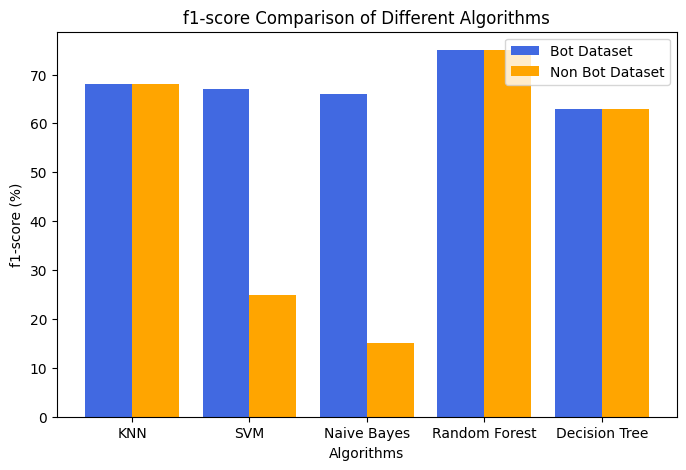

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Algoritmu nosaukumi
algorithms = ["KNN", "SVM", "Naive Bayes", "Random Forest", "Decision Tree"]

# Precizitātes vērtības (Bot Dataset)
bot_dataset_f1_score = [68, 67, 66, 75, 63]

# Precizitātes vērtības (Non Bot Dataset)
non_bot_dataset_f1_score = [68, 25, 15, 75, 63]

# Platuma iestatījums
x = np.arange(len(algorithms))
width = 0.4

# Diagrammas izveide
fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width/2, bot_dataset_f1_score, width, label="Bot Dataset", color="royalblue")
bars2 = ax.bar(x + width/2, non_bot_dataset_f1_score, width, label="Non Bot Dataset", color="orange")

# Nosaukumi un etiķetes
ax.set_xlabel("Algorithms")
ax.set_ylabel("f1-score (%)")
ax.set_title("f1-score Comparison of Different Algorithms")
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Parāda diagrammu
plt.show()


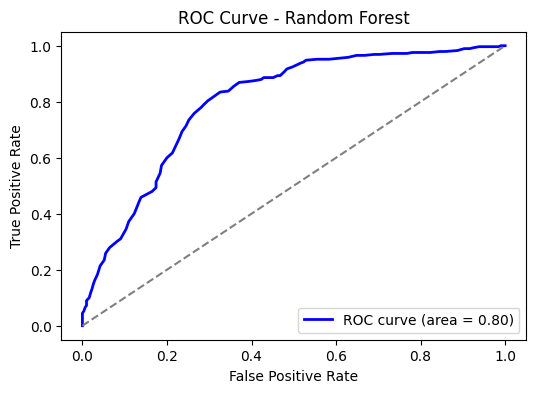

In [19]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Inicializē un apmāca Random Forest modeli
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
model.fit(X_train, Y_train)

# Aprēķina ROC rādītājus
fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Vizualizācija
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonālā līnija
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


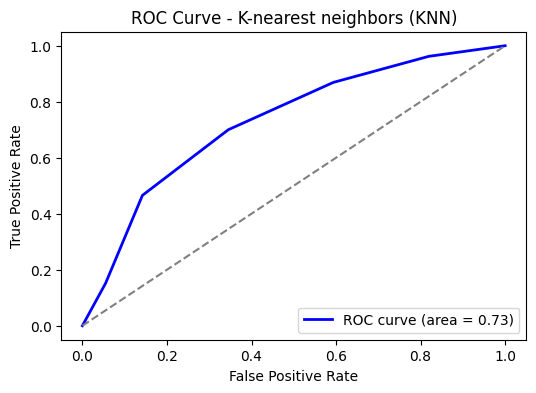

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train.values, Y_train.values)

fpr, tpr, _ = roc_curve(Y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Vizualizācija
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonālā līnija
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - K-nearest neighbors (KNN)")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


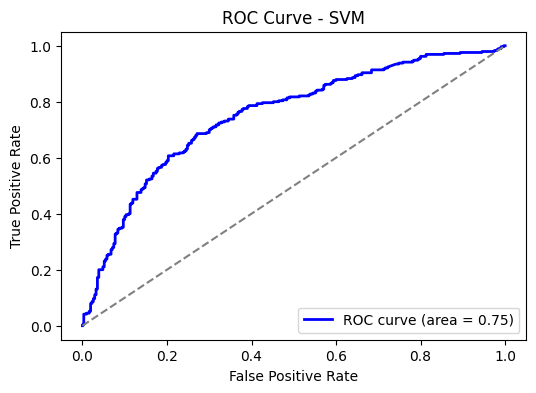

In [38]:
svm_model = SVC(kernel='rbf', probability=True, random_state=0)
svm_model.fit(X_train.values, Y_train.values)


fpr, tpr, _ = roc_curve(Y_test, svm_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Vizualizācija
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonālā līnija
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


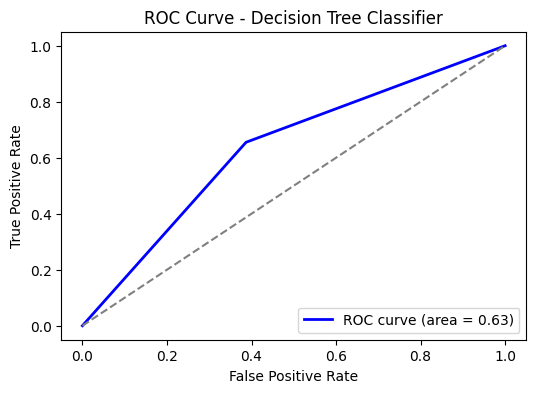

In [19]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train.values, Y_train.values)


fpr, tpr, _ = roc_curve(Y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Vizualizācija
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonālā līnija
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


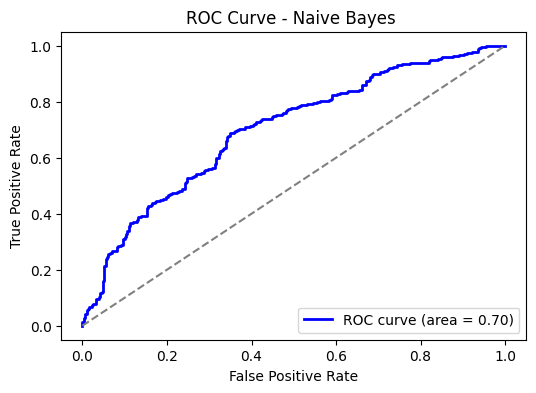

In [20]:
nb_model = GaussianNB()
nb_model.fit(X_train.values, Y_train.values)

fpr, tpr, _ = roc_curve(Y_test, nb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Vizualizācija
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonālā līnija
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes ")
plt.legend(loc="lower right")
plt.show()